In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing

CA_house = fetch_california_housing()

In [2]:
CA_house.data.shape

(20640, 8)

In [3]:
print(CA_house.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [4]:
CA_house.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [5]:
CA_house.target_names

['MedHouseVal']

In [6]:
#explore the data
CA_house_df = pd.DataFrame(CA_house.data, columns=CA_house.feature_names)
CA_house_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [7]:
CA_house_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


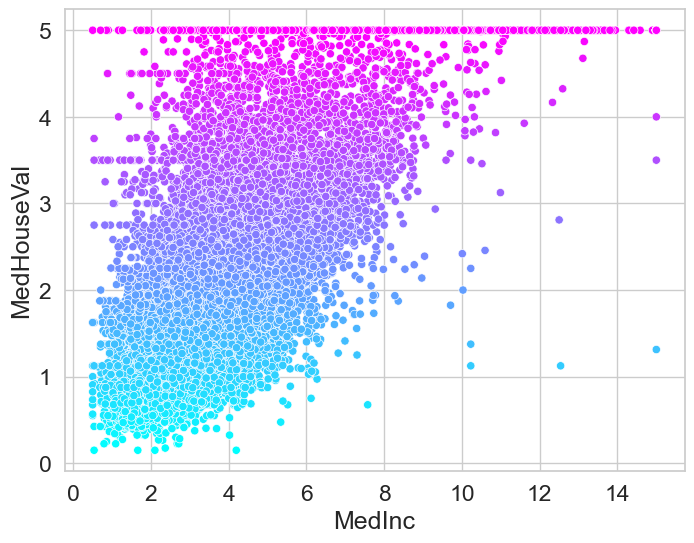

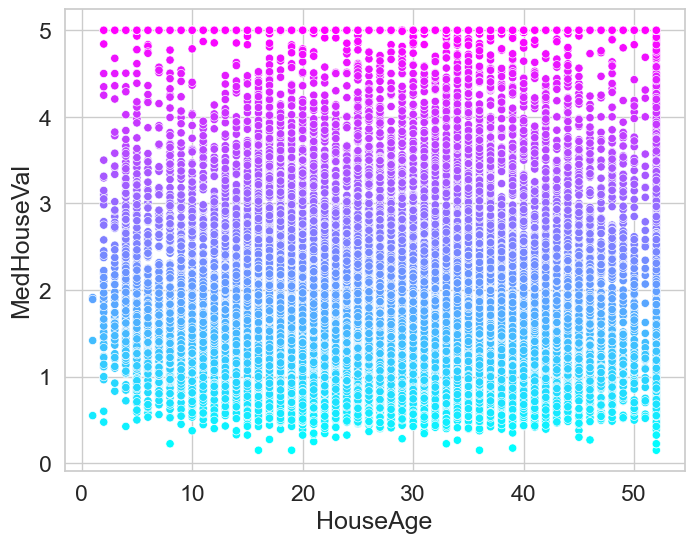

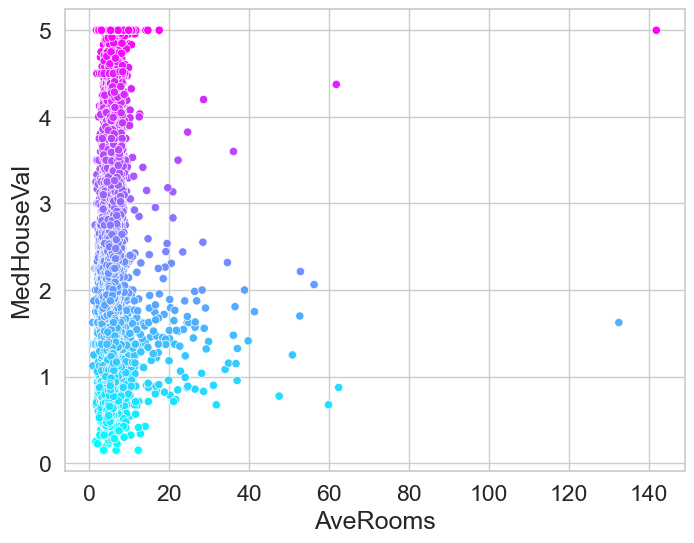

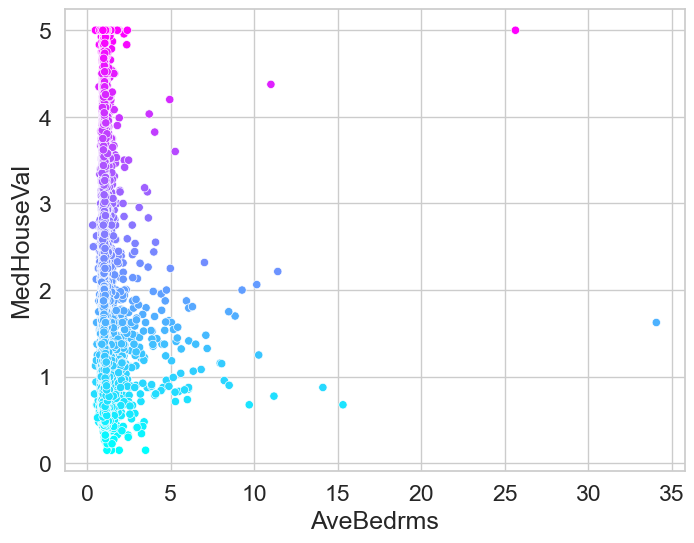

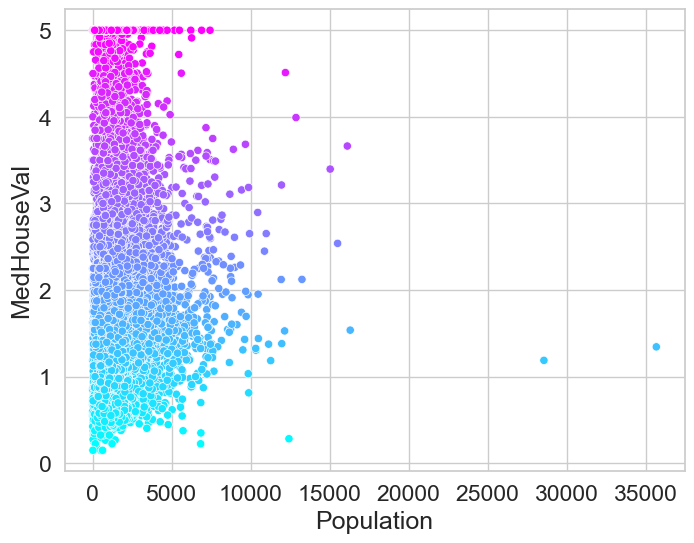

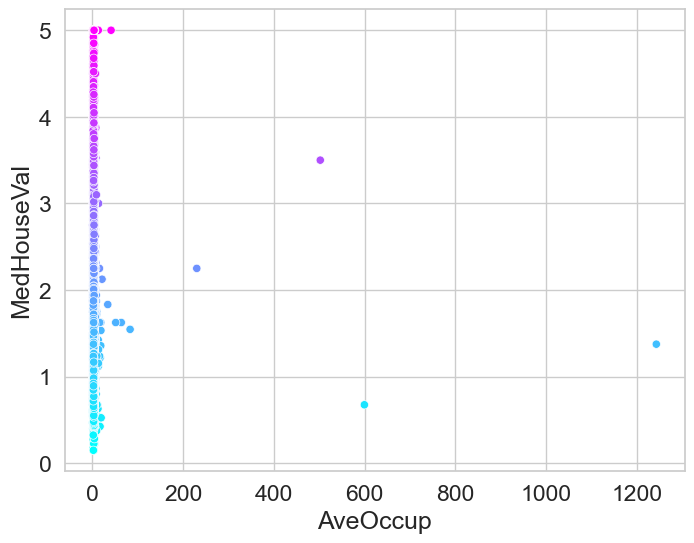

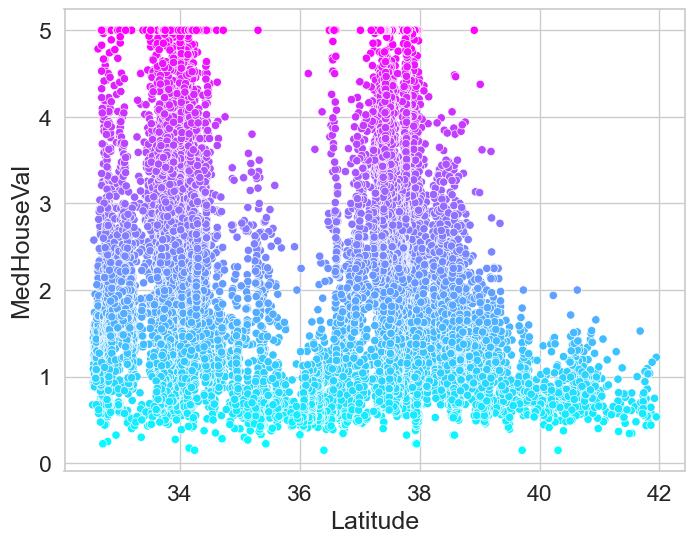

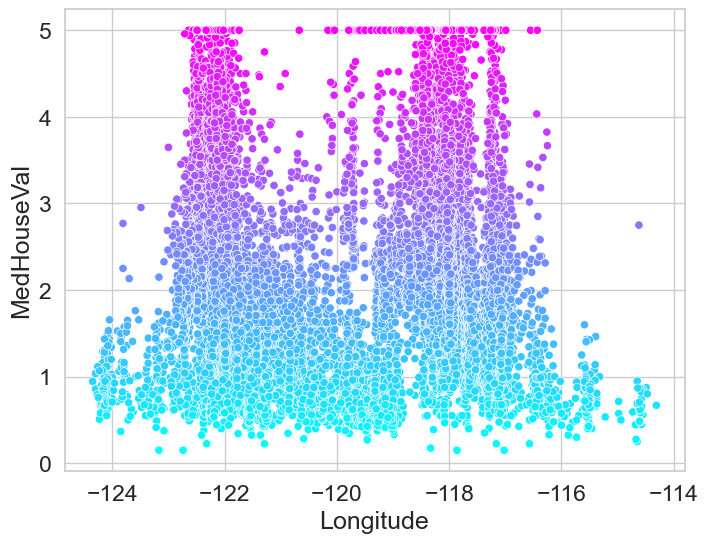

In [8]:
sns.set(font_scale=1.5)
sns.set_style('whitegrid')

CA_house_df['MedHouseVal'] = CA_house.target

#Iterate over each ft and create scatter plot
for feature in CA_house.feature_names:
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=CA_house_df, x=feature,
                   y='MedHouseVal', hue= 'MedHouseVal',
                   palette='cool', legend=False)
    plt.show()

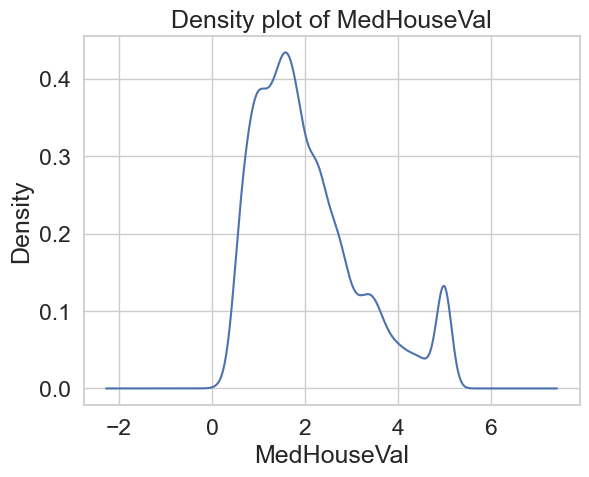

In [9]:
#density plot of response
CA_house_df['MedHouseVal'].plot(kind='density')
plt.xlabel('MedHouseVal')
plt.ylabel('Density')
plt.title("Density plot of MedHouseVal")
plt.show()

In [10]:
#perform outlier removal for fts containing outliers (AveRooms, AveBedrms, AveOccup)

from scipy import stats

X = CA_house.data
y = CA_house.target
feature_names = CA_house.feature_names

#define fts to remove outliers from
selected_fts = ['AveRooms', 'AveBedrms', 'AveOccup']

#find indices of selected fts
ft_indices = [list(feature_names).index(feature) for feature in selected_fts]

#calc z-scores for selected fts
selected_data=X[:, ft_indices]
z_scores=np.abs(stats.zscore(selected_data))

#set threshold for outlier detection
threshold = 3

#find indicies of outlier samples
outlier_indices = np.where(z_scores > threshold)

#remove outlier samples
X_clean = np.delete(X, outlier_indices[0], axis=0)
y_clean = np.delete(y, outlier_indices[0])

#print number of removed outliers
num_outliers = len(outlier_indices[0])
print(f"Number of outliers removed: {num_outliers}")

#Verify shape of cleaned dataset
print("cleaned dataset shape: ")
print(f"X_clean shape: {X_clean.shape}")
print(f"y_clean shape: {y_clean.shape}")

Number of outliers removed: 286
cleaned dataset shape: 
X_clean shape: (20473, 8)
y_clean shape: (20473,)


In [11]:
#split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, random_state=12)


In [12]:
X_train.shape

(15354, 8)

In [13]:
X_test.shape

(5119, 8)

In [14]:
#train linear regression model

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X=X_train, y=y_train)

#print coeff for each ft
for i, name in enumerate(CA_house.feature_names):
    print(f'{name:>10}: {lr.coef_[i]}')

    MedInc: 0.4528944902393656
  HouseAge: 0.010791334844901813
  AveRooms: -0.1406122600984762
 AveBedrms: 1.1810315720765239
Population: 3.0650693383540844e-05
  AveOccup: -0.23414276437538076
  Latitude: -0.42250771498501466
 Longitude: -0.42468866746214173


In [15]:
#testing model

y_predicted = lr.predict(X_test)

Text(0.5, 1.0, 'Linear Regression - Testing results')

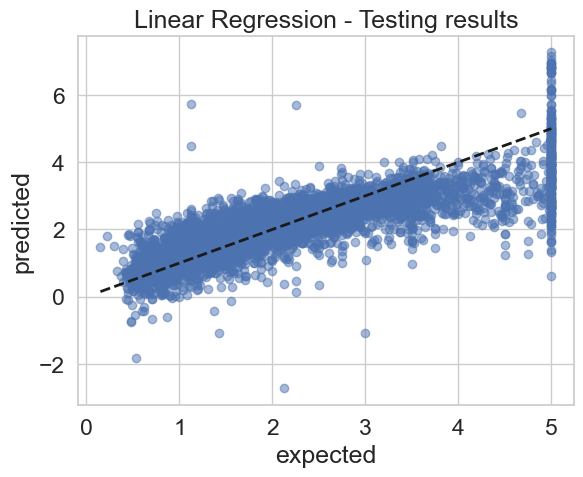

In [16]:
#plot testing results
plt.scatter(y_test, y_predicted, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("expected")
plt.ylabel("predicted")
plt.title ("Linear Regression - Testing results")

In [17]:
from sklearn import metrics

#calc r^2 corr coeff of expected and predicted y values
print("r-square coefficient:", metrics.r2_score(y_test, y_predicted))

r-square coefficient: 0.6369824394287068


In [18]:
#calc mean squared error (MSE)
mse = metrics.mean_squared_error(y_test, y_predicted)
print("MSE:", mse)

MSE: 0.4933390977584034


r2 coeff: 0.6369958454044291
MSE: 0.49332087910265304


Text(0.5, 1.0, 'Ridge Regression - Testing results')

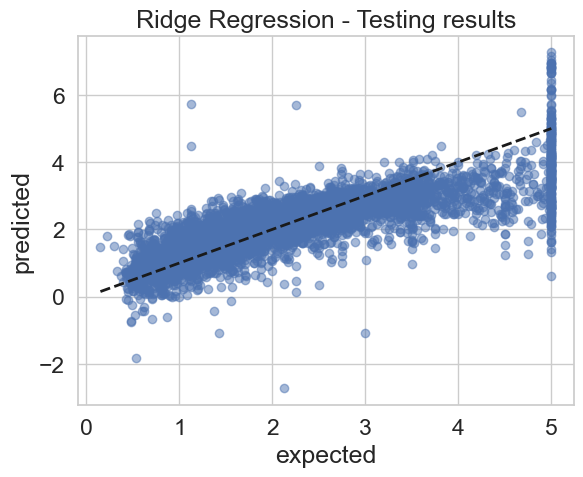

In [19]:
#ridge reg

from sklearn.linear_model import Ridge

ridge=Ridge(alpha=1) #you can adj alpha param as needed
ridge.fit(X_train, y_train)

#make predictions on test set
y_predicted = ridge.predict(X_test)

#calc r^2 corr coeff of expected and predicted y
print("r2 coeff:", metrics.r2_score(y_test, y_predicted))

#calc MSE
mse = metrics.mean_squared_error(y_test, y_predicted)
print("MSE:", mse)

#plot testing results
plt.scatter(y_test, y_predicted, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("expected")
plt.ylabel("predicted")
plt.title ("Ridge Regression - Testing results")


In [20]:
#polynomial reg using poly fts

from sklearn.preprocessing import PolynomialFeatures

#transform fts into poly fts
poly_fts = PolynomialFeatures(degree=2)
X_train_poly = poly_fts.fit_transform(X_train)
X_test_poly = poly_fts.transform(X_test)

X_train_poly.shape

(15354, 45)

In [22]:
#perform linear reg on poly fts

lr = LinearRegression()
lr.fit(X_train_poly, y_train)

#make predictions on test set
y_predicted = lr.predict(X_test_poly)

#calc r2 coeff of...
print("r2 coeff:", metrics.r2_score(y_test, y_predicted))

#calc MSE
mse = metrics.mean_squared_error(y_test, y_predicted)
print("MSE:", mse)

r2 coeff: 0.6802293607613167
MSE: 0.4345667421801163


In [ ]:
#plot poly reg results
plt.scatter(y_test, y_predicted, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("expected")
plt.ylabel("predicted")
plt.title ("Poly Regression - Testing results")

In [ ]:
#lasso reg

from sklearn.linear_model import Lasso

lasso=Lasso(alpha=0.5) #you can adj alpha param as needed
lasso.fit(X_train, y_train)

#make predictions on test set
y_predicted = lasso.predict(X_test)

#calc r^2 corr coeff of expected and predicted y
print("r2 coeff:", metrics.r2_score(y_test, y_predicted))

#calc MSE
mse = metrics.mean_squared_error(y_test, y_predicted)
print("MSE:", mse)

#plot testing results
plt.scatter(y_test, y_predicted, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("expected")
plt.ylabel("predicted")
plt.title ("Lasso Regression - Testing results")


In [25]:
#model selection

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold, cross_val_score

estimators = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'MLP': MLPRegressor()
}

In [27]:
#perform model selection w/ cross validation

for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=5, random_state=12, shuffle=True)
    scores = cross_val_score(estimator=estimator_object,
                            X=X_clean, y=y_clean, cv=kfold,
                            scoring='r2')
    print(f'{estimator_name:>20}: '+
         f'mean of r2 score={scores.mean():.3f}')

   Linear Regression: mean of r2 score=0.649
       Decision Tree: mean of r2 score=0.607
       Random Forest: mean of r2 score=0.812
   Gradient Boosting: mean of r2 score=0.790
                 MLP: mean of r2 score=0.550


## 🏁 Conclusion

This analysis compared several regression algorithms on the California Housing dataset to predict median house prices.  
The results showed that **ensemble methods such as Random Forest and Gradient Boosting Regressors** generally outperformed simpler models like Linear Regression, capturing nonlinear relationships more effectively.  

While the **MLP Regressor** demonstrated potential, it requires additional tuning to reach optimal performance.  
Overall, this comparison highlights how model complexity, feature relationships, and validation techniques influence predictive accuracy in real-world data analysis.
